https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# read csv from github directly
#url_dataset = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
#df = pd.read_csv(url_dataset, nrows=50000)
#data = pd.read_csv(url_dataset)

# read csv from github directly
url_dataset = 'https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/Live%20Assignment%201/df1hotmerge2.csv?raw=true'
#df = pd.read_csv(url_dataset, nrows=50000)
data = pd.read_csv(url_dataset)

In [3]:
print(data.shape)
print(list(data.columns))

(400000, 68)
['Unnamed: 0', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'counter', 'liquor_category', 'store_parent', 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'liquor_category_WHISKY', 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2019', 'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_De

In [4]:
data = data.drop(columns = ['Unnamed: 0'])

In [5]:
count_not_whiskey = len(data[data['liquor_category_WHISKY']==0])
count_whiskey = len(data[data['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 89.56125
percentage of whiskey 10.438749999999999


In [6]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [7]:
to_keep

['pack',
 'bottle_volume_ml',
 'state_bottle_cost',
 'state_bottle_retail',
 'bottles_sold',
 'sale_dollars',
 'volume_sold_liters',
 'volume_sold_gallons',
 'liquor_category_WHISKY',
 'store_parent_CVS',
 'store_parent_Caseys',
 'store_parent_Hy-Vee',
 'store_parent_Kum&Go',
 'store_parent_Other',
 'store_parent_QuikTrip',
 'store_parent_SamsClub',
 'store_parent_SmokingJoes',
 'store_parent_Target',
 'store_parent_Wal-Mart',
 'store_parent_Walgreens',
 'year_2019',
 'monthyear_Apr-2019',
 'monthyear_Aug-2019',
 'monthyear_Dec-2019',
 'monthyear_Feb-2019',
 'monthyear_Jan-2019',
 'monthyear_Jul-2019',
 'monthyear_Jun-2019',
 'monthyear_Mar-2019',
 'monthyear_May-2019',
 'monthyear_Nov-2019',
 'monthyear_Oct-2019',
 'monthyear_Sep-2019',
 'sale_dollars_trans',
 'cost_per_liter',
 'cost_per_liter_trans',
 'state_bottle_cost_trans',
 'bottles_sold_trans',
 'volume_sold_liters_trans',
 'grossmargin']

In [8]:
data_final=data[to_keep]
data_final.columns.values

array(['pack', 'bottle_volume_ml', 'state_bottle_cost',
       'state_bottle_retail', 'bottles_sold', 'sale_dollars',
       'volume_sold_liters', 'volume_sold_gallons',
       'liquor_category_WHISKY', 'store_parent_CVS',
       'store_parent_Caseys', 'store_parent_Hy-Vee',
       'store_parent_Kum&Go', 'store_parent_Other',
       'store_parent_QuikTrip', 'store_parent_SamsClub',
       'store_parent_SmokingJoes', 'store_parent_Target',
       'store_parent_Wal-Mart', 'store_parent_Walgreens', 'year_2019',
       'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_Dec-2019',
       'monthyear_Feb-2019', 'monthyear_Jan-2019', 'monthyear_Jul-2019',
       'monthyear_Jun-2019', 'monthyear_Mar-2019', 'monthyear_May-2019',
       'monthyear_Nov-2019', 'monthyear_Oct-2019', 'monthyear_Sep-2019',
       'sale_dollars_trans', 'cost_per_liter', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'grossmargin'], dtype=object)

In [9]:
X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [10]:
X

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,store_parent_CVS,store_parent_Caseys,...,monthyear_Nov-2019,monthyear_Oct-2019,monthyear_Sep-2019,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,grossmargin
0,20,375,3.85,5.78,20,115.60,7.50,1.98,0,0,...,1,0,0,4.750136,15.413333,2.735233,1.348073,2.995732,2.014903,0.333910
1,8,50,8.75,13.13,1,13.13,0.05,0.01,0,0,...,1,0,0,2.574900,262.600000,5.570632,2.169054,0.000000,-2.995732,0.333587
2,12,1000,16.50,24.75,6,148.50,6.00,1.58,0,0,...,0,0,0,5.000585,24.750000,3.208825,2.803360,1.791759,1.791759,0.333333
3,6,750,21.17,31.76,24,762.24,18.00,4.75,0,0,...,1,0,0,6.636261,42.346667,3.745890,3.052585,3.178054,2.890372,0.333438
4,6,1750,9.31,13.97,12,167.64,21.00,5.54,0,0,...,1,0,0,5.121819,7.982857,2.077296,2.231089,2.484907,3.044522,0.333572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12,750,7.49,11.24,12,134.88,9.00,2.37,0,0,...,0,0,0,4.904385,14.986667,2.707161,2.013569,2.484907,2.197225,0.333630
399996,12,750,7.49,11.24,12,134.88,9.00,2.37,0,0,...,0,0,0,4.904385,14.986667,2.707161,2.013569,2.484907,2.197225,0.333630
399997,12,750,7.49,11.24,12,134.88,9.00,2.37,0,0,...,0,0,0,4.904385,14.986667,2.707161,2.013569,2.484907,2.197225,0.333630
399998,12,750,7.49,11.24,12,134.88,9.00,2.37,0,0,...,0,0,0,4.904385,14.986667,2.707161,2.013569,2.484907,2.197225,0.333630


In [11]:
y

,liquor_category_WHISKY
0,0
1,0
2,0
3,1
4,0
...,...
399995,0
399996,0
399997,0
399998,0


In [12]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [13]:
logisticRegr.fit(X_train, y_train)

C:\Users\jjsch\.conda\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jjsch\.conda\envs\ML7331\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
coef = logisticRegr.coef_[0]
classes = logisticRegr.classes_[0]
intercept = logisticRegr.intercept_[0]
print (coef)

[-0.02464    -0.00285441  0.10014316  0.07883748 -0.0914584   0.00655795
 -0.06687549 -0.01739451  0.00601502 -0.0439949   0.13759434 -0.07031363
 -0.1064443  -0.01925749  0.00632584 -0.02248643  0.00163002 -0.01297902
 -0.00462387 -0.12853439 -0.04048755  0.02396751 -0.01667891 -0.00651837
 -0.02598669 -0.03640248 -0.02821925  0.01383915 -0.02364487  0.00059604
  0.0058359   0.00516514 -0.12268712 -0.00735115 -0.27845731  0.02102466
 -0.09117704  0.15577018 -0.04324832]


In [25]:
intercept

-0.12853762886433034

In [26]:
classes

0

In [21]:
len(X_train.columns)

39

In [82]:
# Returns a NumPy Array
predictions = logisticRegr.predict(X_test)

In [93]:
params =logisticRegr.get_params(deep=True)
params

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [95]:
decfunct = pd.DataFrame(logisticRegr.decision_function(X_test))
decfunct

,0
0,-3.079998
1,0.459976
2,-7.231539
3,-4.024893
4,-4.252727
...,...
119995,-2.195293
119996,-2.755813
119997,-2.446943
119998,-1.665184


In [83]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9206083333333334


In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logisticRegr.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.915


ROC Curves and AUC in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

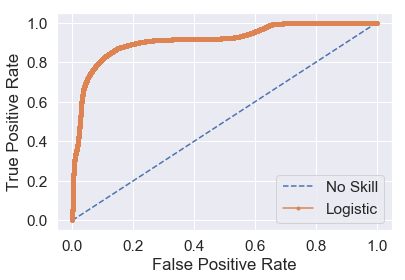

In [84]:
from matplotlib import pyplot
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Precision-Recall Curves in Python

Logistic: f1=0.522 auc=0.669


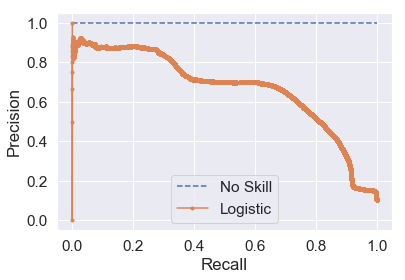

In [87]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = logisticRegr .predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

When to Use ROC vs. Precision-Recall Curves?
Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [51]:
predictionsdf = pd.DataFrame(predictions)

In [52]:
predictionsdf[predictionsdf[0] == 1]

,0
1,1
24,1
35,1
49,1
72,1
...,...
119910,1
119928,1
119948,1
119974,1


In [53]:
X_test

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,store_parent_CVS,store_parent_Caseys,...,monthyear_Nov-2019,monthyear_Oct-2019,monthyear_Sep-2019,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,grossmargin
242160,6,1750,19.00,28.50,18,513.00,31.50,8.32,0,0,...,0,0,0,6.240276,16.285714,2.790288,2.944439,2.890372,3.449988,0.333333
3413,6,750,19.99,29.99,1,35.24,0.75,0.19,0,0,...,0,0,0,3.562182,46.986667,3.849864,2.995232,0.000000,-0.287682,0.333444
393024,12,750,3.37,5.06,12,60.72,9.00,2.37,0,0,...,0,0,0,4.106273,6.746667,1.909049,1.214913,2.484907,2.197225,0.333992
247987,12,750,8.25,12.38,8,99.04,6.00,1.58,0,0,...,0,0,1,4.595524,16.506667,2.803764,2.110213,2.079442,1.791759,0.333603
52436,12,750,5.72,8.58,2,17.16,1.50,0.39,0,0,...,0,0,0,2.842581,11.440000,2.437116,1.743969,0.693147,0.405465,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124278,12,1000,11.34,17.01,12,204.12,12.00,3.17,0,0,...,0,0,0,5.318708,17.010000,2.833801,2.428336,2.484907,2.484907,0.333333
277397,6,750,9.06,13.59,6,81.54,4.50,1.18,0,0,...,0,0,1,4.401094,18.120000,2.897016,2.203869,1.791759,1.504077,0.333333
253618,12,750,8.25,12.38,3,37.14,2.25,0.59,0,0,...,0,0,0,3.614695,16.506667,2.803764,2.110213,1.098612,0.810930,0.333603
3884,12,1000,14.49,21.74,12,260.88,12.00,3.17,0,0,...,0,0,0,5.564061,21.740000,3.079154,2.673459,2.484907,2.484907,0.333487


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [56]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[105275   2116]
 [  7411   5198]]


In [57]:
cm.shape

(2, 2)

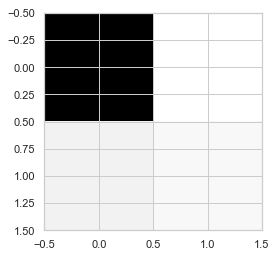

In [58]:
plt.imshow(cm, cmap='binary')

In [59]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(cm, range(2), range(2))

In [60]:
df_cm

,0,1
0,105275,2116
1,7411,5198


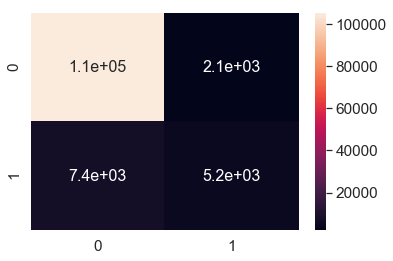

In [61]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 10],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

In [28]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])